In [2]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder

In [3]:
#load dataset
df = pd.read_csv("data/StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
#checking for descriptive statistic
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [5]:
#checking for the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [59]:
#checking for missing values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [60]:
df = df.drop(columns="parental level of education")
df.head()

,gender,race/ethnicity,lunch,test preparation course,math score,reading score,writing score
0,female,group B,standard,none,72,72,74
1,female,group C,standard,completed,69,90,88
2,female,group B,standard,none,90,95,93
3,male,group A,free/reduced,none,47,57,44
4,male,group C,standard,none,76,78,75


In [63]:
#encode the categorical data
categorical_cols = ['gender', 'race/ethnicity', 'lunch', 'test preparation course']
for col in categorical_cols:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])
df.head()

,gender,race/ethnicity,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,72,72,74
1,0,2,1,0,69,90,88
2,0,1,1,1,90,95,93
3,1,0,0,1,47,57,44
4,1,2,1,1,76,78,75


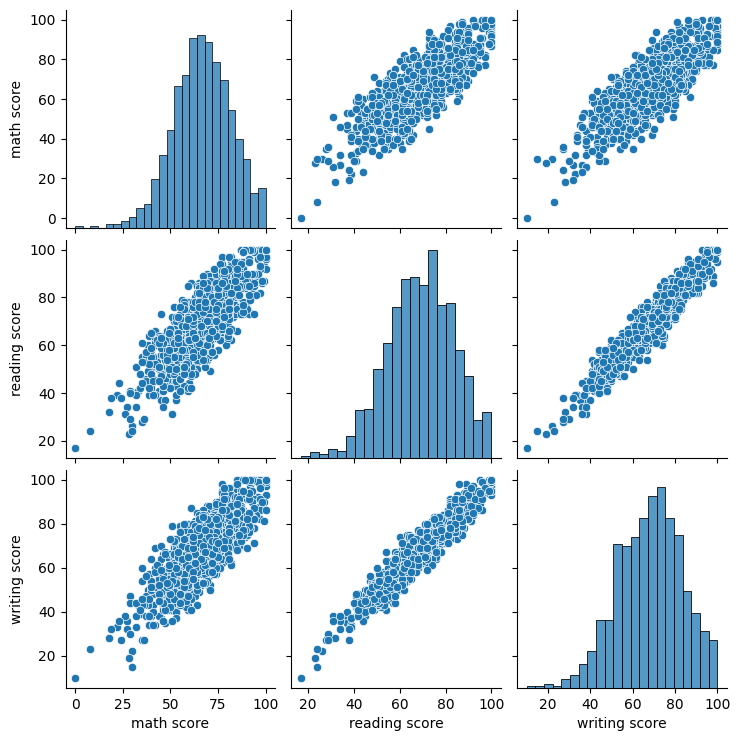

In [15]:
#pairplot visualization
pair = sns.pairplot(df, vars=['math score', 'reading score', 'writing score'])

<Axes: >

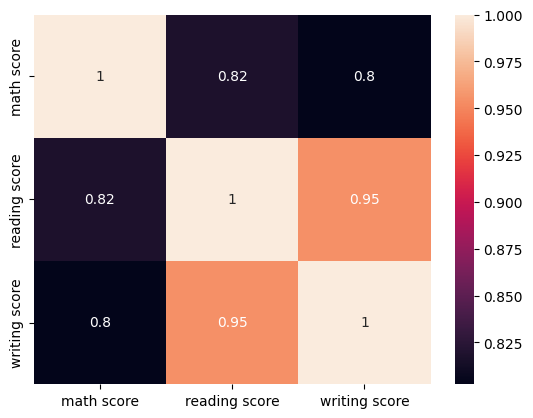

In [16]:
sns.heatmap(df[['math score', 'reading score', 'writing score']].corr(), annot=True)

In [64]:
#initialize the labeled data. Features and target
X = df.drop(columns="math score", axis=1)
y = df['math score']

In [65]:
#spliting of the data into train and test part
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [66]:
#initialize the model
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [81]:
#predict
y_pred = model.predict(X_test)

array([77.49560818, 56.80137429, 79.56080199, 76.87642379, 84.66362489,
       80.16085226, 64.82518592, 52.12160435, 74.94873062, 49.73129839,
       50.51353398, 34.04449321, 66.33718841, 53.44180209, 87.50829086,
       71.75467668, 54.10152874, 49.60668688, 50.58707359, 54.68130788,
       76.5349241 , 40.96092743, 58.07064524, 37.52279504, 79.36336613,
       83.3135366 , 78.40211355, 48.21516583, 30.24391632, 50.53315372,
       64.66141948, 71.05254318, 60.92319949, 79.746466  , 81.08862352,
       44.12019562, 78.043043  , 71.05410645, 68.6821987 ,  5.29948706,
       79.74872315, 66.66992999, 70.43279029, 57.75988412, 82.22541441,
       63.35126454, 72.94815087, 25.39080299, 87.93792766, 68.68445585,
       74.57081876, 68.8678627 , 81.67641632, 44.2352302 , 66.42752046,
       68.21389256, 88.01300917, 60.11339367, 82.42510743, 79.35712402,
       45.88036414, 72.20328019, 71.45397809, 53.553358  , 89.45049865,
       65.21491214, 60.36173566, 56.01397137, 57.49968737, 84.37

In [68]:
#evalute
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

Mean Absolute Error: 4.111700773848939
R2 Score: 0.8851028448695629


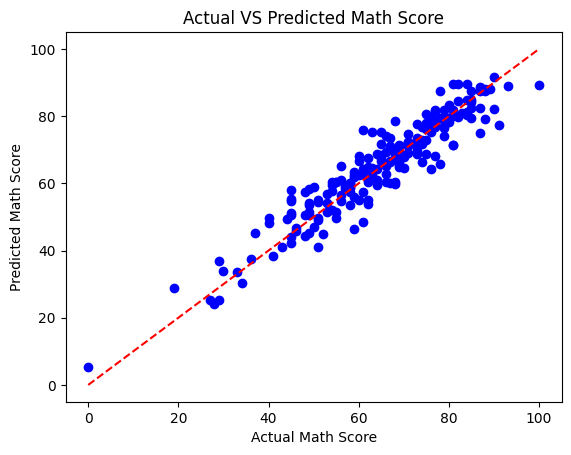

In [69]:
#visualization
plt.scatter(y_test, y_pred, color="blue")
plt.xlabel("Actual Math Score")
plt.ylabel("Predicted Math Score")
plt.title("Actual VS Predicted Math Score")
plt.plot([0, 100], [0, 100], '--r')

In [72]:
#initailize decision tree model
d_model = DecisionTreeRegressor()
d_model.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [73]:
#decision tree predict
d_y_pred = d_model.predict(X_test)

In [74]:
#decision tree evaluation
print(f"Mean Absolute Error: {mean_absolute_error(y_test, d_y_pred)}")
print(f"R2 Score: {r2_score(y_test, d_y_pred)}")

Mean Absolute Error: 6.3475
R2 Score: 0.7372640323105601


In [75]:
#initialize random forest model
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [76]:
#random forest predict
rf_y_pred = rf_model.predict(X_test)

In [77]:
#random forest evaluation
print(f"Mean Absolute Error: {mean_absolute_error(y_test, rf_y_pred)}")
print(f"R2 Score: {r2_score(y_test, rf_y_pred)}")

Mean Absolute Error: 4.603351547619048
R2 Score: 0.8511330387093892


In [78]:
#initialize gradient boosting model
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [79]:
#gradient boosting predict
gb_y_pred = gb_model.predict(X_test)

In [80]:
#gradient boosting evaluation
print(f"Mean Absolute Error: {mean_absolute_error(y_test, gb_y_pred)}")
print(f"R2 Score: {r2_score(y_test, gb_y_pred)}")

Mean Absolute Error: 4.221663577319621
R2 Score: 0.8746796281707605
